In [495]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [496]:
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    precision_score, 
    recall_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [497]:
df = pd.read_csv("../our_analyses/dataset_prepared.csv")

In [498]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,afrobeat
1,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,afrobeat
2,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,afrobeat
3,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,afrobeat
4,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,afrobeat


In [499]:
from sklearn.preprocessing import LabelEncoder

df=df.drop(['name', 'artists', 'album_name'], axis=1)

genre_groups = {
    'j-dance': 0, 'techno': 0, 'mandopop': 0, 'idm': 0, 'chicago-house': 0, 'breakbeat': 0,  # Elettronica/Dance
    'black-metal': 1,  # Metal/Rock
    'bluegrass': 2,  # Country/Folk
    'j-idol': 3, 'spanish': 3, 'disney': 3, 'brazil': 3,  # Pop/Commerciale
    'iranian': 4, 'afrobeat': 4, 'indian': 4, 'forro': 4,  # World
    'happy': 5, 'sleep': 5, 'study': 5,  # Ambient/New Age
    'industrial': 6  # Other
}

# Mappatura dei generi del dataframe ai gruppi di generi
df['genre_group'] = df['genre'].map(genre_groups).astype(int)

# Stampa del mapping dei generi ai numeri corrispondenti
print(df['genre_group'].unique())

le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

[4 1 2 3 0 5 6]


In [500]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,genre_group
0,293106,0,50,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,afrobeat,4
1,194972,0,52,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,afrobeat,4
2,178428,0,22,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,afrobeat,4
3,238373,0,20,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,afrobeat,4
4,221893,0,22,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,afrobeat,4


In [501]:
X = df.values
y = np.array(df['genre_group'])
X = df.drop('genre_group', axis=1)
X = df.drop('genre', axis=1)

## Partitioning

In [502]:
from sklearn.model_selection import train_test_split

random_state = 0

In [503]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=random_state
)

## normalization

In [504]:
from sklearn.preprocessing import StandardScaler

In [505]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## K-NN

In [506]:
from sklearn.neighbors import KNeighborsClassifier

In [507]:
clf = KNeighborsClassifier(n_neighbors=5, metric="cityblock", weights="distance")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='cityblock', weights='distance')

In [508]:
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array([0, 0, 4, ..., 6, 0, 0])

In [509]:
from sklearn.model_selection import learning_curve

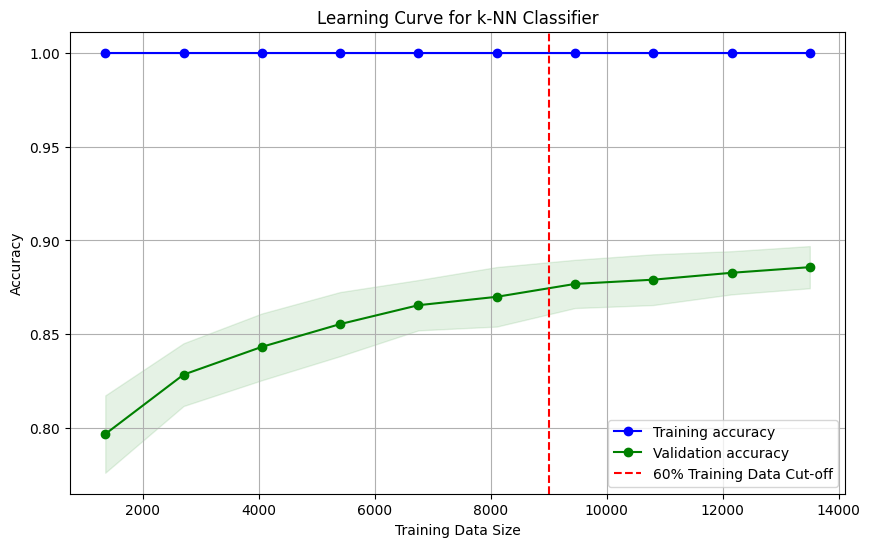

In [510]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Utilizza l'oggetto classificatore 'clf' che hai definito nel tuo screenshot
estimator=clf

X = df.drop('genre_group', axis=1)

X = df.drop('genre', axis=1)
y = df['genre_group']

# Normalizza l'intero dataset prima di passarlo alla funzione 'learning_curve'
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Ora puoi utilizzare 'X_norm' e 'y' nella funzione 'learning_curve'
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf, X=X_norm, y=y, train_sizes=train_sizes, cv=10,
    scoring='accuracy', n_jobs=-1, shuffle=True, random_state=0
)


# Calcola la media e la deviazione standard dell'accuratezza del training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calcola la media e la deviazione standard dell'accuratezza del test set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotta la curva di apprendimento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

# Calcola la dimensione del set di addestramento al punto di partizionamento
# Presumendo che 'X' sia il tuo intero set di dati e y il vettore target
partition_point = len(X) * 0.6

# Aggiungi la linea verticale
plt.axvline(x=partition_point, color='red', linestyle='--', label='60% Training Data Cut-off')

plt.title('Learning Curve for k-NN Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()